# Boom Bike Sharing Prediction using Linear Regression

## Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Reading, understanding and visualizing the data

In [2]:
bike_df = pd.read_csv(r'C:\Users\HP\Desktop\Ipsita\Study\Linear Regression Assignment\day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [3]:
#Checking the shape of the dataframe 
bike_df.shape

(730, 16)

### Null value Check

In [4]:
for col in bike_df.columns:
    print(f"{col}: {bike_df[col].isnull().sum()}")

instant: 0
dteday: 0
season: 0
yr: 0
mnth: 0
holiday: 0
weekday: 0
workingday: 0
weathersit: 0
temp: 0
atemp: 0
hum: 0
windspeed: 0
casual: 0
registered: 0
cnt: 0


In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [6]:
#Checking the numerical columns data distribution statistics
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Removing unwanted column

In [7]:
bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike_df.shape

(730, 12)

### Encoding categorical column

In [8]:
#Season
bike_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

#Month
bike_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

#weathersit
bike_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

#weekday
bike_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)


In [9]:
bike_df['weathersit'].value_counts()

Clear             463
Misty             246
Light_rainsnow     21
Name: weathersit, dtype: int64

In [10]:
bike_df['weekday'].value_counts()

Sunday       105
Monday       105
Saturday     105
Friday       104
Thursday     104
Tuesday      104
Wednesday    103
Name: weekday, dtype: int64

In [11]:
bike_df['mnth'].value_counts()

Jul    62
May    62
Mar    62
Oct    62
Aug    62
Jan    62
Dec    62
Sep    60
Jun    60
Apr    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [12]:
bike_df['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

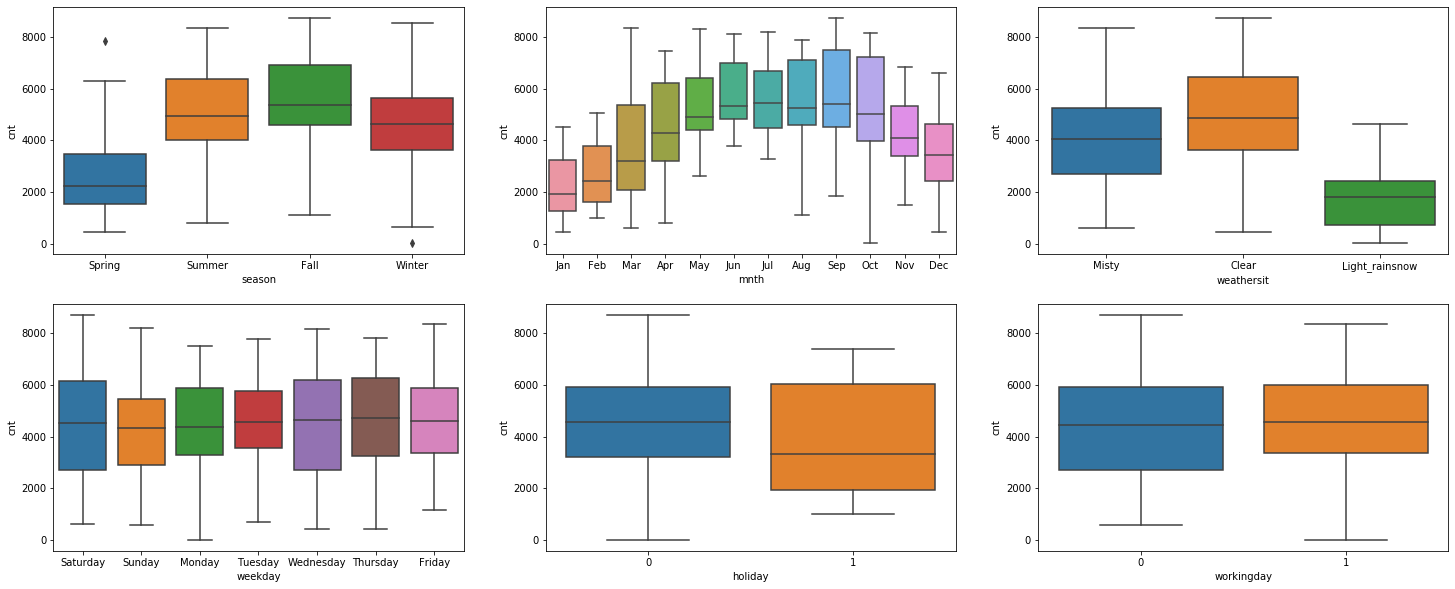

In [13]:
import seaborn as sns
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.show()

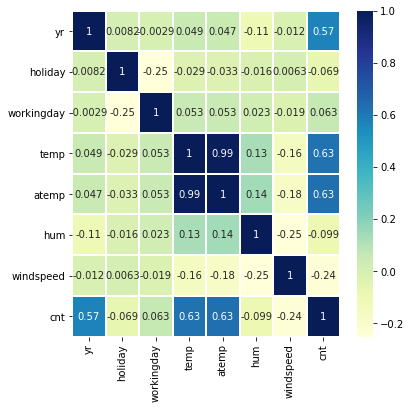

In [14]:
plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_df.corr(), annot = True, cmap="YlGnBu",linewidth =1)
plt.show()

#### Getting counts for each Categorical features and visualizing it

In [15]:
df_temporary = bike_df.copy()
df_temporary.yr.replace((0,1), ('2018','2019'), inplace=True)
df_temporary.holiday.replace((0,1), ('holiday','not-holiday'), inplace=True)
df_temporary.workingday.replace((0,1), ('workingday','not-workingday'), inplace=True)                      

def catVar_stats(col):
    temp_df = df_temporary.groupby(col)['cnt'].agg(['sum', 'count'])
    return round(temp_df,2)

In [16]:
stat_col = ['season', 'mnth', 'weathersit', 'weekday', 'holiday', 'workingday', 'yr']
stat_table =pd.DataFrame()

for i in stat_col:
    stat_table=  stat_table.append(catVar_stats(i), ignore_index = False)
    
stat_table ['categorical'] = stat_table.index

stat_table

,sum,count,categorical
Fall,1061129,188,Fall
Spring,469514,180,Spring
Summer,918589,184,Summer
Winter,841613,178,Winter
Apr,269094,60,Apr
Aug,351194,62,Aug
Dec,211036,62,Dec
Feb,149518,56,Feb
Jan,134933,62,Jan
Jul,344948,62,Jul


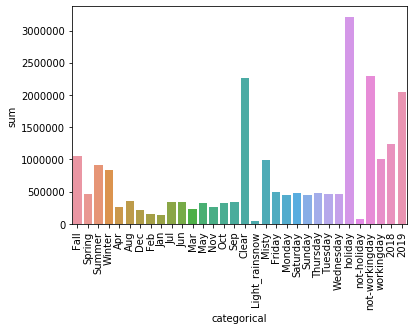

In [17]:
sns.barplot(y=stat_table['sum'], x=stat_table['categorical'])
plt.xticks(rotation=90);

From above we can infer :

1.	The demand of bike is less in Spring season, as compared to other seasons. The demand of bike is more in Fall season as compared to other seasons
2.	The demand of bike is more in year 2019 as compared to year 2018
3.	The demand of bike is lowest in month of January and it is highest in month of August. 
4.	Bike demand is more in Clear weather (Clear, Few clouds, Partly cloudy, Partly cloudy) as compared to other weather condition. For Light Snow (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds), the demand of bike is lowest (there isn’t any data available for heavy snow in the input dataset provided)
5.	Bike demand is more in holidays as compared to not a holiday
6.	The demand of bike is more on a weekday Friday followed by Thursday
7.	Bike demand is more in not-working day as compared to working days

## Preparing the data for Modelling

### Creating Dummy Variables

In [18]:
season = pd.get_dummies(bike_df['season'], drop_first = True)
weather = pd.get_dummies(bike_df['weathersit'], drop_first = True)
month = pd.get_dummies(bike_df['mnth'], drop_first = True)
weekday = pd.get_dummies(bike_df['weekday'], drop_first = True)
bike_df_final =  pd.concat([bike_df,season,month,weather,weekday], axis = 1)
bike_df_final.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bike_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
yr                730 non-null int64
holiday           730 non-null int64
workingday        730 non-null int64
temp              730 non-null float64
atemp             730 non-null float64
hum               730 non-null float64
windspeed         730 non-null float64
cnt               730 non-null int64
Spring            730 non-null uint8
Summer            730 non-null uint8
Winter            730 non-null uint8
Aug               730 non-null uint8
Dec               730 non-null uint8
Feb               730 non-null uint8
Jan               730 non-null uint8
Jul               730 non-null uint8
Jun               730 non-null uint8
Mar               730 non-null uint8
May               730 non-null uint8
Nov               730 non-null uint8
Oct               730 non-null uint8
Sep               730 non-null uint8
Light_rainsnow    730 non-null uint8
Misty             730 non-null uint8

### Splitting the data into Train & Test Dataset

In [19]:
bike_train, bike_test = train_test_split(bike_df_final, train_size = 0.7, random_state = 42)

### Rescaling the Features

### Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

In [20]:
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])


## Training the Model

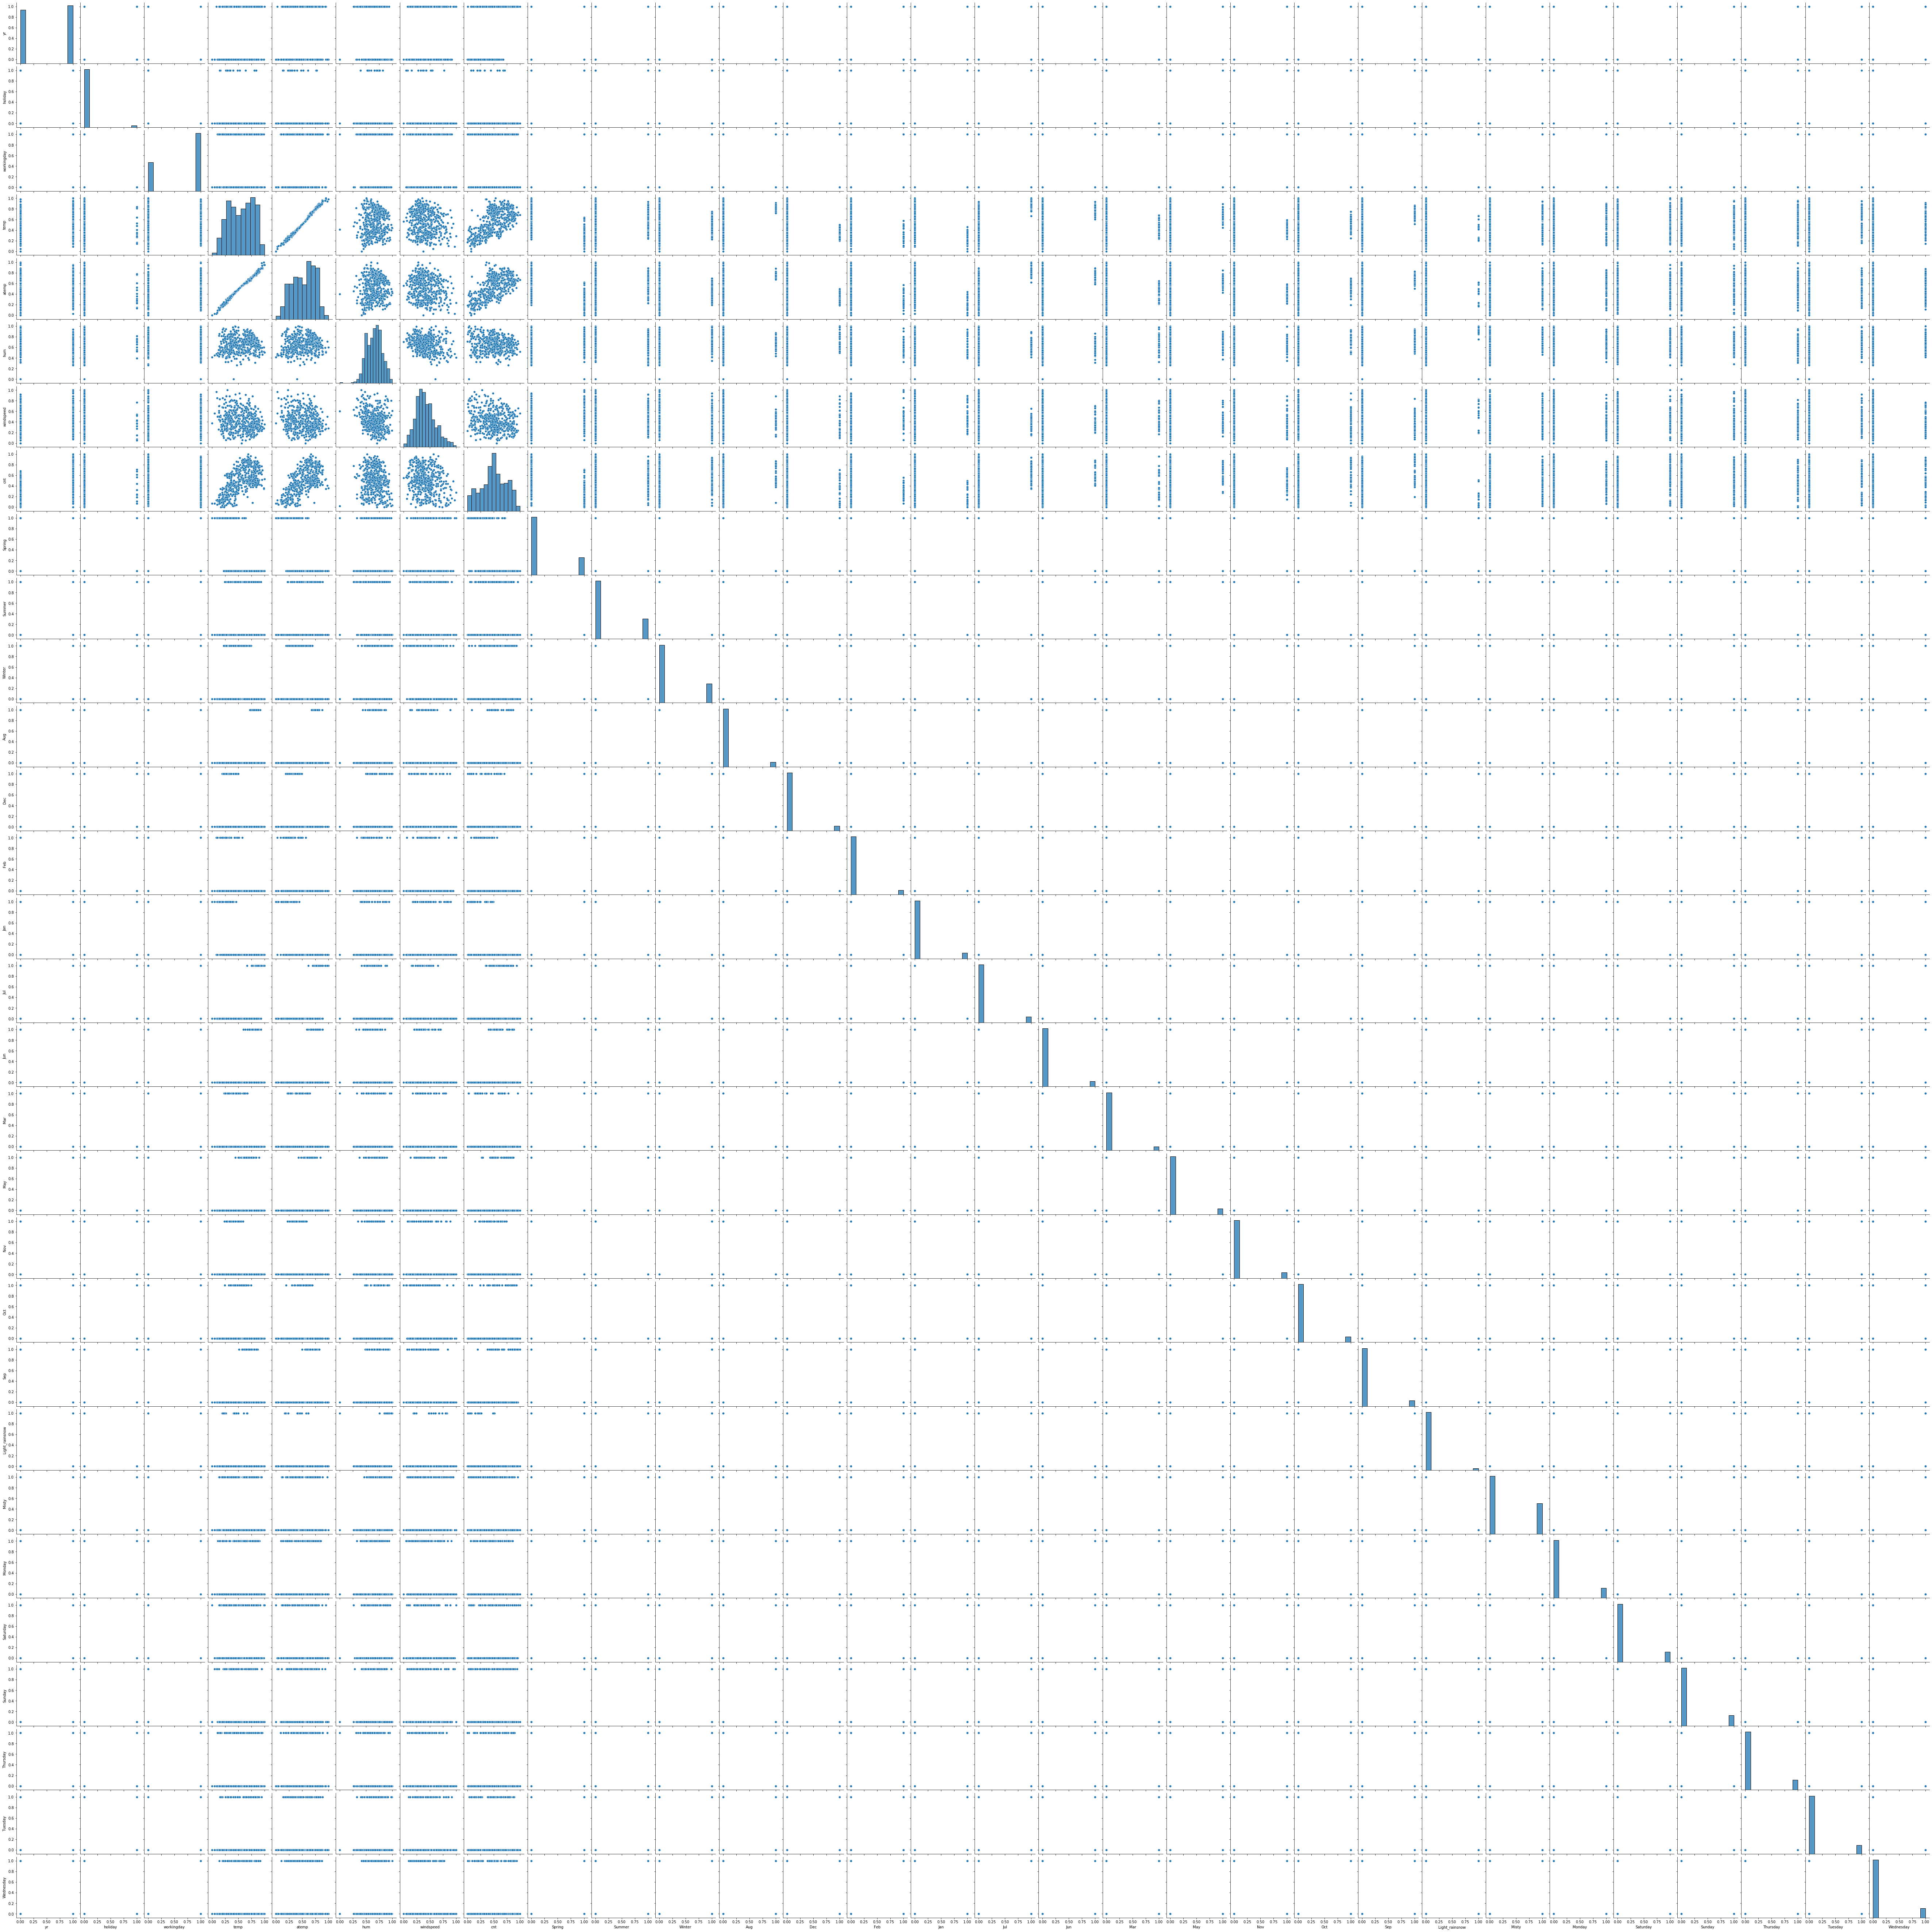

In [21]:
sns.pairplot(bike_train)

plt.show()

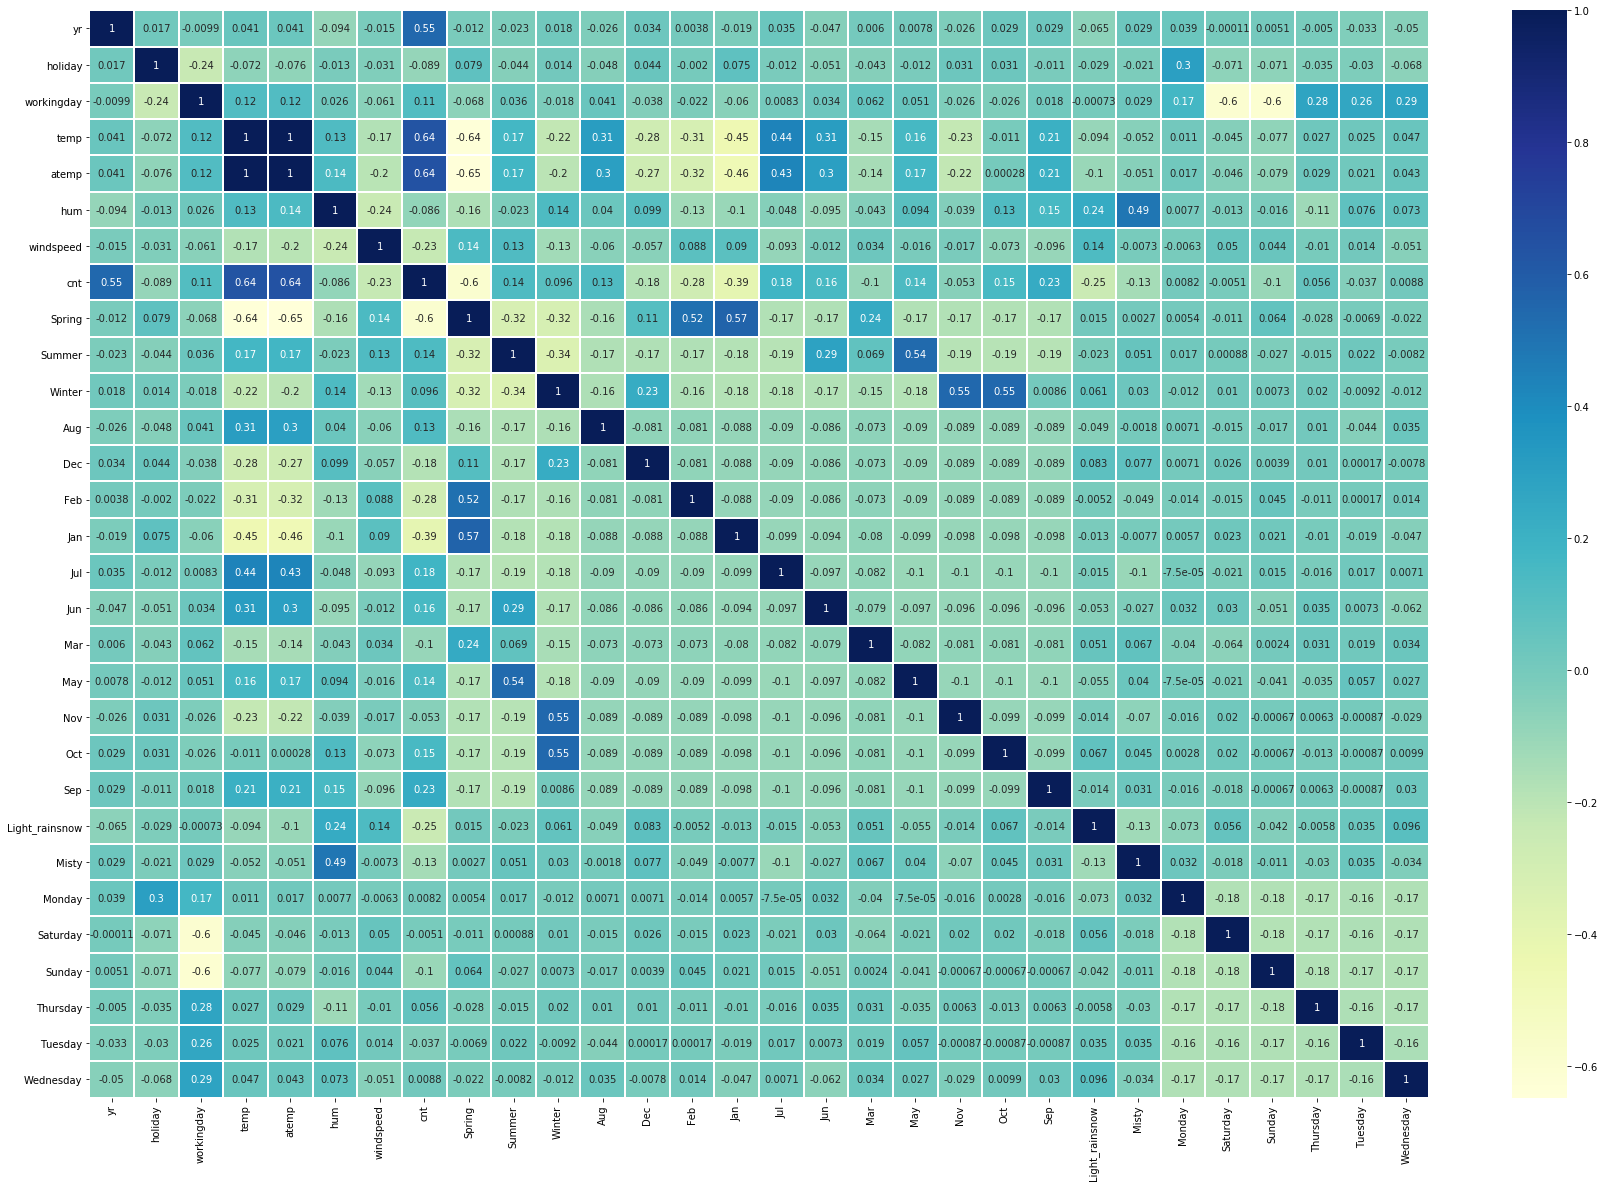

In [22]:
plt.figure(figsize = (30,20))
ax= sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu",linewidth =1)
plt.show()

### Observation
* temp and atemp are highly correlated with value 1. We can use only one of these two variables for building a model

* Spring has negative correlation with temp, atemp and cnt (target variable)

* Jan has negative correlation with temp, atemp and cnt (target variable)

* workingday has negative correlation with Sat & Sun

* Positive correlation with cnt can be seen for temp, atemp and yr


### Building the Linear Model

In [23]:
y_train = bike_train.pop('cnt')
X_train = bike_train

### RFE -- Recursive feature elimination

In [24]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [25]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 11),
 ('Winter', True, 1),
 ('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', False, 8),
 ('Jan', False, 14),
 ('Jul', True, 1),
 ('Jun', False, 15),
 ('Mar', True, 1),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 5),
 ('Sep', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Monday', False, 10),
 ('Saturday', True, 1),
 ('Sunday', False, 9),
 ('Thursday', False, 13),
 ('Tuesday', False, 7),
 ('Wednesday', False, 12)]

In [26]:
# storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'Spring', 'Winter', 'Dec',
       'Jul', 'Mar', 'Nov', 'Sep', 'Light_rainsnow', 'Misty', 'Saturday'],
      dtype='object')

In [27]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'Summer', 'Aug', 'Feb', 'Jan', 'Jun', 'May',
       'Oct', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [28]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [29]:
# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

#### Feature removal based on Significance (p-values) and VIF :

- High p would be values greater than '0.05' and high VIF would refer values greater than '5'

    - High p value, High VIF

    - High - Low :
        - High p, Low VIF : Remove these Features First
        - Low p, High VIF : Remove these Features after the [High p, Low VIF] condition

    - Low p value, Low VIF - These shouldn't be removed as they indicate significal features

### Model 1

In [30]:
calculateVIF(X_train_rfe)

,Features,VIF
2,atemp,1225.70
1,temp,1196.45
3,hum,25.44
4,windspeed,5.37
6,Winter,2.74
5,Spring,2.73
13,Misty,2.27
0,yr,2.09
10,Nov,1.82
8,Jul,1.49


In [31]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.4
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          1.07e-184
Time:                        21:42:41   Log-Likelihood:                 482.58
No. Observations:                 510   AIC:                            -933.2
Df Residuals:                     494   BIC:                            -865.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3283      0.037      8.

### Model 2 
Removing temp based on High VIF and p-value

In [32]:
X_train_new = X_train_rfe.drop(['temp'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,hum,24.88
1,atemp,17.36
3,windspeed,5.03
4,Spring,2.72
5,Winter,2.69
12,Misty,2.26
0,yr,2.09
9,Nov,1.82
7,Jul,1.48
6,Dec,1.37


In [33]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          7.79e-186
Time:                        21:42:41   Log-Likelihood:                 482.57
No. Observations:                 510   AIC:                            -935.1
Df Residuals:                     495   BIC:                            -871.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3282      0.037      8.

### Model 3
Removing Saturday as it has high p-value

In [34]:
X_train_new = X_train_new.drop(['Saturday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,hum,24.79
1,atemp,17.35
3,windspeed,4.99
4,Spring,2.72
5,Winter,2.69
12,Misty,2.25
0,yr,2.09
9,Nov,1.82
7,Jul,1.48
6,Dec,1.37


In [35]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.5
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          1.66e-186
Time:                        21:42:42   Log-Likelihood:                 481.42
No. Observations:                 510   AIC:                            -934.8
Df Residuals:                     496   BIC:                            -875.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3328      0.037      9.

### Model 4
Removing low p and High VIF hum

In [36]:
X_train_new = X_train_new.drop(['hum'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,atemp,5.34
2,windspeed,4.94
4,Winter,2.36
0,yr,2.08
3,Spring,1.79
8,Nov,1.77
11,Misty,1.57
6,Jul,1.43
5,Dec,1.33
9,Sep,1.23


In [37]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.8
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          5.38e-184
Time:                        21:42:42   Log-Likelihood:                 472.67
No. Observations:                 510   AIC:                            -919.3
Df Residuals:                     497   BIC:                            -864.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2365      0.029      8.

F-Staitsics :
F-Statistics is used for testing the overall significance of the Model. The higher the F-Statistics, the more significant the model is

In [38]:
# Checking the parameters obtained
lr4.params

const             0.236468
yr                0.241595
atemp             0.441830
windspeed        -0.081500
Spring           -0.162485
Winter            0.083225
Dec              -0.068584
Jul              -0.053022
Mar               0.054613
Nov              -0.085300
Sep               0.049708
Light_rainsnow   -0.265918
Misty            -0.084282
dtype: float64

## Model Validation
Validating the assumption of Linear Regression Model :

- Linear Relationship
- Homoscedasticity
- Absence of Multicollinearity
- Independence of residuals
- Normality of Errors

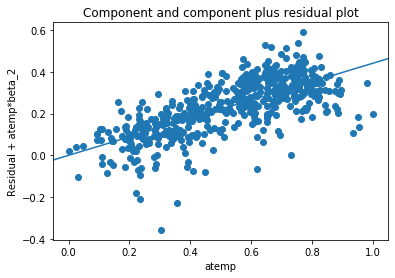

In [39]:
#Linear Relationship
sm.graphics.plot_ccpr(lr4, 'atemp')
plt.show()

##### We see a linear relationship between the model and precictor variable

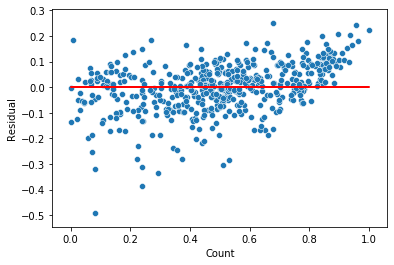

In [40]:
#Homoscedasticity

y_train_pred = lr4.predict(X_train_lm4)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

##### There isn't any visible pattern in residual values, hence homoscedacity is well preserved

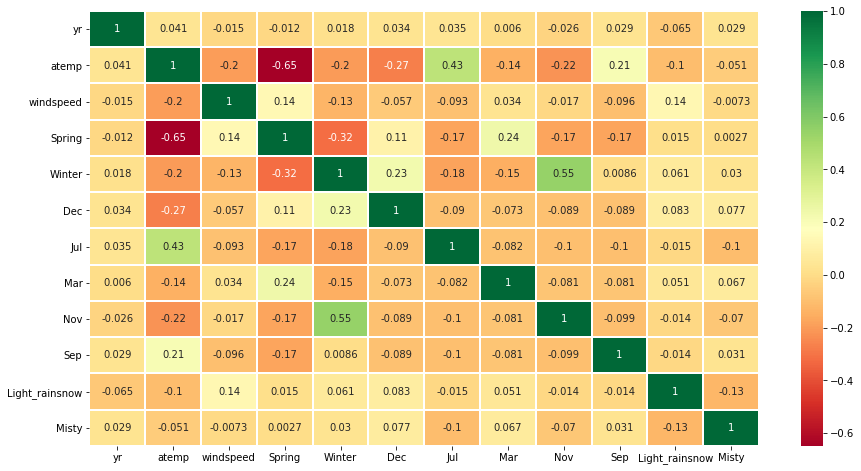

In [41]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [42]:
# Run the function to calculate VIF for the final model
calculateVIF(X_train_new)

,Features,VIF
1,atemp,5.34
2,windspeed,4.94
4,Winter,2.36
0,yr,2.08
3,Spring,1.79
8,Nov,1.77
11,Misty,1.57
6,Jul,1.43
5,Dec,1.33
9,Sep,1.23


##### All the predictor variables have VIF value around 5 (for atemp it is 5.34). So we can consider that there is insignificant multicolinearity among the predictor variables.

Independence of residuals
Autocorrelation refers to the fact that observations’ errors are correlated. To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables.

0 – 2: positive auto-correlation
2 – 4: negative auto-correlation)

In [43]:
print('The Durbin-Watson value for Final Model lr 4 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model lr 4 is 2.066


### Normality of error

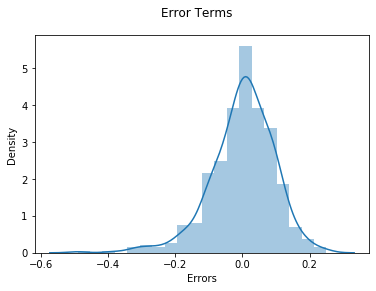

In [44]:
res = y_train-y_train_pred

# Plot the histogram of the error terms and verifying if it's normally distributed with mean is zero

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

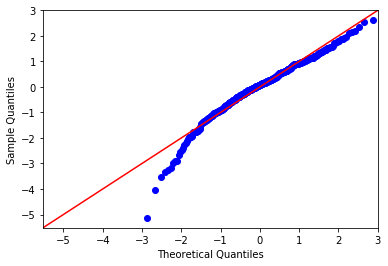

In [45]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

**The error terms are following a normal distribution**

##  Predictions using final model

In [46]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0.848606,0,1,...,0,0,0,0,0,1,0,0,0,0
148,0,0,0,0.758058,0.704203,0.843709,0.479765,0.526017,0,1,...,0,0,0,0,0,0,1,0,0,0
302,0,0,0,0.324018,0.317998,0.642765,0.386287,0.350115,0,0,...,1,0,0,0,0,0,1,0,0,0
355,0,0,1,0.453814,0.455552,0.780592,0.062325,0.318363,1,0,...,0,0,0,1,0,0,0,1,0,0
515,1,0,1,0.773634,0.724915,0.507943,0.433030,0.833877,0,1,...,0,0,0,0,0,0,0,1,0,0


In [47]:
# Dividing X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test

In [48]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)

X_test_lm4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 468 to 683
Data columns (total 13 columns):
const             220 non-null float64
yr                220 non-null int64
atemp             220 non-null float64
windspeed         220 non-null float64
Spring            220 non-null uint8
Winter            220 non-null uint8
Dec               220 non-null uint8
Jul               220 non-null uint8
Mar               220 non-null uint8
Nov               220 non-null uint8
Sep               220 non-null uint8
Light_rainsnow    220 non-null uint8
Misty             220 non-null uint8
dtypes: float64(3), int64(1), uint8(9)
memory usage: 10.5 KB


In [49]:
# Making predictions using the final model (lr4)

y_pred = lr4.predict(X_test_lm4)

## Model Evaluation

Text(0, 0.5, 'y_pred')

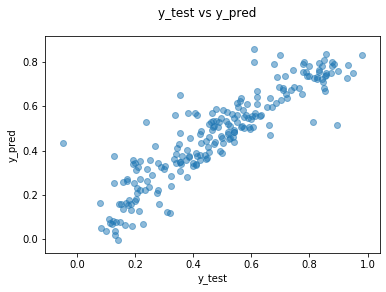

In [50]:
# plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')  
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

In [51]:
r2 = round(r2_score(y_test, y_pred),4)
r2

0.8126

In [52]:
#Adjusted R2 Value Calculation for bike_test dataframe

# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.8017

### RMSE for the selected Model

In [53]:
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.1005

### Mean Absolute Error for the selected Model

In [54]:
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0754

#### The Root Mean Squared Error value for the test dataset based on final model is 0.1005 and Mean Absolute Error is 0.0754, which indicates that the model is good fit.

### As per the final model, the top 3 predictor variables that influences bike booking are:

- Temperature (atemp)
    - A coefficient value of ‘0.44183’ indicated that a temperature has significant impact on bike rentals
- Light_rainsnow  (weathersit =3)
    - A coefficient value of ‘-0.265918’ indicated that the light snowrain deters people from renting out bikes
- Year (yr)
    - A coefficient value of ‘0.241595’ indicated that a year wise the rental numbers are increasing

R-squared:Train - 0.832 and Test - 0.813

Adj. R-squared:Train - 0.828 and Test - 0.802

Comparing R-squared and Adj. R-squared of Train and Test datasets, it can been seen that the difference is within 5%, which is acceptable

#### Final Equation : 

cnt = 0.236468 + 0.241595*yr + 0.44183*atemp + (-0.0815*windspeed) + (-0.162485*Spring) + 0.083225*Winter +(-0.068584*Dec) + (-0.053022*Jul) + 0.054613*Mar + (-0.0853*Nov) + 0.049708*Sep + (-0.265918*Light_rainsnow) + (-0.084282*Misty)
